# View Exposures of postISRCCD


- work with Weakly_2022_09
- use jupyter kernel LSST



- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab
- creation date : 2022/03/22



In [1]:
! eups list -s | grep LOCAL

atmospec              LOCAL:/sps/lsst/groups/auxtel/softs/shared/auxteldm_gen3/repos/w_2022_09/atmospec 	setup
eups                  LOCAL:/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2022_09/conda/envs/lsst-scipipe-2.0.0/eups 	setup
rapid_analysis        LOCAL:/sps/lsst/groups/auxtel/softs/shared/auxteldm_gen3/repos/w_2022_09/rapid_analysis 	setup


In [2]:
! echo $IMAGE_DESCRIPTION
! eups list -s lsst_distrib


   g64fc59b30a+e1dba0a6f6 	w_latest w_2022_09 current setup


In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib.colors import LogNorm

from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.ticker                         # here's where the formatter is
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

from astropy.visualization import (MinMaxInterval, SqrtStretch,ZScaleInterval,PercentileInterval,
                                   ImageNormalize,imshow_norm)
from astropy.visualization.stretch import SinhStretch, LinearStretch,AsinhStretch,LogStretch

from astropy.io import fits

# be sure all these libraries are installed
pip install holoviews
pip install xarray


In [4]:
# Bokeh for interactive visualization
import bokeh
from bokeh.io import output_file, output_notebook, show
from bokeh.layouts import gridplot
from bokeh.models import ColumnDataSource, CDSView, GroupFilter, HoverTool
from bokeh.plotting import figure
from bokeh.transform import factor_cmap

import holoviews as hv
from holoviews import streams, opts
from holoviews.operation.datashader import rasterize
from holoviews.operation.datashader import datashade, dynspread
from holoviews.plotting.util import process_cmap

import datashader as dsh

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
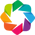

Loading BokehJS ...

In [5]:
# Set the holoviews plotting library to be bokeh
# You will see the holoviews + bokeh icons displayed when the library is loaded successfully
#hv.extension('bokeh')
hv.extension('bokeh', 'matplotlib')

# Display bokeh plots inline in the notebook
output_notebook()

In [6]:
import lsst.afw.display as afwDisplay
afwDisplay.setDefaultBackend('matplotlib')

In [7]:
import lsst.daf.butler as dafButler

# Configuration

## Select flags options

In [8]:
FLAG_ROTATE_IMG = True
FLAG_TRANSFORM = True

## Transformations
astropy scale transformations

In [9]:
transform = AsinhStretch() + PercentileInterval(99.)
#transform = PercentileInterval(98.)

## Range in image flat values

In [10]:
VMIN = 0.5
VMAX = 1.5

## Histograms bins

In [11]:
NBINS_HISTO = 200

## Holoview Elements config

### Histogram config

In [12]:
HV_HISTO_SINGLE_WIDTH  = 400
HV_HISTO_SINGLE_HEIGHT = 350
HV_HISTO_MULTI_WIDTH  = 350
HV_HISTO_MULTI_HEIGHT = 300
HV_HISTO_MULTI_COLS   = 3

## Image configuration

In [13]:
HV_IMAGE_SINGLE_WIDTH  = 400
HV_IMAGE_SINGLE_HEIGHT = 400
HV_IMAGE_SINGLE_FRAME_WIDTH = 600
HV_IMAGE_MULTI_WIDTH  = 400
HV_IMAGE_MULTI_HEIGHT = 400
HV_IMAGE_MULTI_FRAME_WIDTH = 350
HV_IMAGE_MULTI_COLS   = 3

## Butler

In [14]:
repo = '/sps/lsst/groups/auxtel/softs/shared/auxteldm_gen3/data/butler.yaml'
butler = dafButler.Butler(repo)
registry = butler.registry

## Utils

In [15]:
def isflat(row):
    #print(row["filter"])
    if str(row["type"]) == "flat":
        return True
    
    else:
        return False 

In [16]:
TOOLTIPS = [
    ('name', "$name"),
    ('index', "$index"),
    ('pattern', '@pattern'),
    ("x", "$x"),
    ("y", "$y"),
    ("value", "@image"),
    ('squared', '@squared')
]

TOOLTIPS = [
    ("(x,y)", "($x, $y)"),
]

hover = HoverTool(description='Custom Tooltip', tooltips=[('x', '@x'), ('y', '@y')])


# Custom hover tool for the source detections
myhover = HoverTool(
    tooltips=[
        ( 'x', '@x{0.2f}'),
        ( 'y', '@y{0.2f}'),
    ],
    formatters={
        'x' : 'printf',
        'y' : 'printf',
    },
    
)

In [17]:
# Define some default plot options for the Image
img_opts = dict(
                #height=600, width=700, 
                xaxis="bottom", 
                padding = 0.01, fontsize={'title': '8pt'},
                colorbar=True, toolbar='right', show_grid=True,
                aspect='equal',
                frame_width=HV_IMAGE_SINGLE_FRAME_WIDTH ,
                tools=['hover','crosshair','undo','redo','zoom_in','zoom_out'],
                #tools=[myhover,'crosshair'],
               )     

## Dataset Query

In [18]:
collection = "u/dagoret/first_test2"
datasetRefs = registry.queryDatasets(datasetType='postISRCCD', collections=collection, where= "instrument='LATISS'")

In [19]:
all_ref_for_postisrccd = []

for i, ref in enumerate(datasetRefs):
    all_ref_for_postisrccd.append(ref.dataId)
    print("fullId: ",ref.dataId.full)
 

fullId:  {band: 'white', instrument: 'LATISS', detector: 0, physical_filter: 'empty~holo4_003', exposure: 2021070700317}
fullId:  {band: 'white', instrument: 'LATISS', detector: 0, physical_filter: 'empty~holo4_003', exposure: 2021070700318}
fullId:  {band: 'white', instrument: 'LATISS', detector: 0, physical_filter: 'empty~holo4_003', exposure: 2021070700319}
fullId:  {band: 'white', instrument: 'LATISS', detector: 0, physical_filter: 'empty~holo4_003', exposure: 2021070700319}
fullId:  {band: 'white', instrument: 'LATISS', detector: 0, physical_filter: 'empty~holo4_003', exposure: 2021070700320}
fullId:  {band: 'white', instrument: 'LATISS', detector: 0, physical_filter: 'empty~holo4_003', exposure: 2021070700320}
fullId:  {band: 'white', instrument: 'LATISS', detector: 0, physical_filter: 'empty~holo4_003', exposure: 2021070700321}
fullId:  {band: 'white', instrument: 'LATISS', detector: 0, physical_filter: 'empty~holo4_003', exposure: 2022031600330}
fullId:  {band: 'white', instrum

# Select the exposure to view

In [436]:
exposure_selected = 2022031600435

In [437]:
raw= butler.get('raw', dataId={'exposure': exposure_selected, 'instrument': 'LATISS', 'detector': 0}, collections = collection)
meta = raw.getMetadata()
md = meta.toDict()
md

/sps/lsst/groups/auxtel/softs/shared/auxteldm_gen3/data/LATISS/raw/all/raw/20220316/AT_O_20220316_000435/raw_LATISS_empty~holo4_003_AT_O_20220316_000435_RXX_S00_LATISS_raw_all.fits: outAmp.getRawBBox() != data.getBBox(); patching. ((minimum=(0, 0), maximum=(543, 2047)) v. (minimum=(0, 0), maximum=(575, 2047)))


{'SIMPLE': True,
 'EXTEND': True,
 'COMMENT': ["  FITS (Flexible Image Transport System) format is defined in 'Astronomy",
  "  and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H",
  "= '        '",
  '---- Date, night and basic image information ----',
  "= '        '",
  '---- Telescope info, location, observer ----',
  "= '        '",
  '---- Pointing info, etc. ----',
  "= '        '",
  '---- TAN Projection ----',
  "= '        '",
  '---- Image-identifying used to build OBS-ID ----',
  "= '        '",
  '---- Additional Keys Information from Camera ----',
  "= '        '",
  '---- Image sequence numbers',
  "= '        '",
  '---- Test Stand information ----',
  "= '        '",
  '---- Information from Camera (Common block) ----',
  "= '        '",
  '---- Information from Camera ----',
  "= '        '",
  '---- Filter/grating information ----',
  "= '        '",
  '---- Exposure-related information ----',
  "= '        '",
  '---- Weather information ----',
  

In [438]:
md['HASTART']

-2.61515080677184

In [439]:
md['HAEND']

-2.60875014459143

In [440]:
md['HA'] = (md['HASTART']+ md['HAEND'])/2.

In [441]:

ccd = butler.get('postISRCCD', dataId={'exposure': exposure_selected, 'instrument': 'LATISS', 'detector': 0}, collections = collection)

fig = plt.figure()
afw_display = afwDisplay.Display(1)
afw_display.scale('asinh', 'zscale')
afw_display.mtv(ccd.image)
plt.gca().axis('off')

(-0.5, 4071.5, -0.5, 3999.5)

In [442]:
img_data =ccd.image.array

In [443]:
if FLAG_TRANSFORM: 
    scaledImage = transform(img_data)
else:
    scaledImage = img_data

In [444]:
if FLAG_ROTATE_IMG:
    rotscaledImage=np.rot90(scaledImage)
else:
    rotscaledImage = scaledImage

In [445]:
rotscaledImage

array([[0.18473835, 0.28219905, 0.35750696, ..., 0.06698643, 0.01609152,
        0.        ],
       [0.24689607, 0.22441344, 0.16633211, ..., 0.        , 0.        ,
        0.        ],
       [0.01969177, 0.21669585, 0.3550628 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.46263528, 0.56094855, 0.5011249 , ..., 0.15083742, 0.16574413,
        0.        ],
       [0.2708177 , 0.6312702 , 0.6157024 , ..., 0.28922614, 0.24826798,
        0.07120259],
       [0.39980105, 0.5610736 , 0.62491304, ..., 0.23044965, 0.        ,
        0.16357085]], dtype=float32)

In [446]:
VMIN= rotscaledImage.ravel().min()
VMAX= rotscaledImage.ravel().max()

In [447]:
# Create the Image element.
bounds_img=(0,0,rotscaledImage.shape[1],rotscaledImage.shape[0])
img = hv.Image(rotscaledImage, bounds=bounds_img,
               kdims=['x', 'y']).opts(cmap = "Greys_r",  xlabel = 'x', ylabel ='y',title = f"Exposure : {exposure_selected}",clim=(VMIN,VMAX), **img_opts)

In [448]:
rasterize(img)

:DynamicMap   []
   :Image   [x,y]   (z)

In [449]:
filenameout = "exposure_" + str(exposure_selected)+"_postisrccd.fits"
filenameout

'exposure_2022031600435_postisrccd.fits'

In [450]:
flip_image=np.flip(img_data, 0)  # flip the image for Spectractor

In [451]:
hdr = fits.Header()
    
for key,value in md.items():
    hdr[str(key)]=value
        
primary_hdu = fits.PrimaryHDU(header=hdr)
image_hdu = fits.ImageHDU(flip_image)
hdu_list = fits.HDUList([primary_hdu, image_hdu])
    
hdu_list.writeto(filenameout,overwrite=True)
    